In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import operator
import numpy as np
from matplotlib.font_manager import FontProperties

In [3]:
file ="data.json"
with open(file, 'r', encoding='utf-8') as obj:
    data = json.load(obj)


In [10]:
df = pd.DataFrame(data)
df.columns
d = df[['topics']]
d.columns = ['標籤']
d.head(50)

,標籤
0,[貓貓]
1,"[飼料, 寵物, 狗]"
2,"[貓, 寵物, 貓咪, 美短, 吸貓]"
3,"[貓, 寵物, 曼赤肯, 貓咪, 可愛]"
4,"[尾巴, 寵物, 貓, 可愛, 笑死]"
5,"[貓, 名字, 寵物]"
6,"[黑貓, 貓, 貓咪, 可愛]"
7,"[結紮, 胰臟, 瑪爾濟斯]"
8,"[早安, 寵物, 狗, 薩摩耶, 可愛]"
9,"[貓, 寵物, 貓咪, 橘貓, 貓貓]"


{'M': 19, 'F': 54}


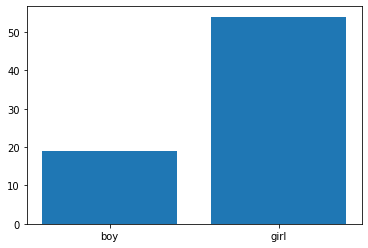

In [9]:
#發文者性別比
gender = {"M":0, "F":0}
for content in data:
    gender[content['gender']]+=1
print(gender)
Kind = ['boy','girl']
Data = [gender['M'],gender['F']]
plt.bar(Kind ,Data)
plt.show()

In [4]:
topics=[]
for content in data:
    topics.append(content['topics'])

for i in range(len(topics)):
    a = topics[i]
    
Empty =[]
for i in range(len(topics)):
    a = topics[i]
    catcnt=0
    dogcnt=0
    odogcnt=0
    for j in range(len(a)):
        
        if ((a[j] == "貓咪") or (a[j] == "貓") or (a[j] == "貓貓")):
            catcnt+=1
        elif((a[j] == "狗") or (a[j] == "狗狗")):
            dogcnt+=1
        elif((a[j] == "浪浪") or (a[j] == "野狗") or (a[j] == "流浪狗")):
            odogcnt+=1
        else:
            Empty.append(a[j])
            
    if(catcnt>0):
        Empty.append("貓咪")
    if(dogcnt>0):
        Empty.append("狗")
    if(odogcnt>0):
        Empty.append("浪浪")
#print(Empty)    
    

In [5]:
WCnt = dict()
for word in Empty:
    if word in WCnt.keys():
        WCnt[word]+=1
    else:
        WCnt[word]=1
    SWC=sorted(WCnt.items(),key=operator.itemgetter(1),reverse=True)

In [6]:
xf = SWC
Fdf=pd.DataFrame(xf)
Fdf.to_csv('pet_count.csv',encoding='utf-8-sig')
f = open('pet_count.txt','a')
for t in range(0,len(xf)):
    f.writelines(xf[t][0]+","+str(xf[t][1])+"\n")
f.close()
#將結果存進csv檔和txt檔

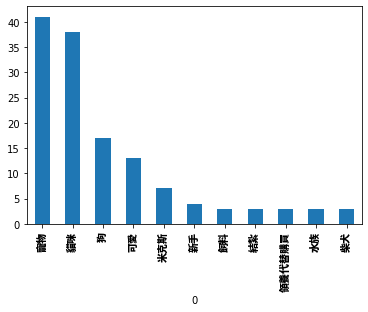

In [7]:
acc = pd.read_csv('pet_count.csv')
accData = acc.loc[0:10,['0','1']]
accData = accData.set_index('0')
axes = accData.plot(kind='bar')
myfont = FontProperties(fname=r'./NotoSansCJK-Black.ttc')
for label in axes.get_xticklabels():
    label.set_fontproperties(myfont)
axes.get_legend().remove()
plt.show()